name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
"Î Î¬ÏÏÎ±, ÎÏÏÎ¹ÎºÎ® ÎÎ»Î»Î¬Î´Î±, ÎÎ»Î»Î·Î½Î¹ÎºÎ· ÎÎ·Î¼Î¿ÎºÏÎ±ÏÎ¹Î±",2022-05-01T00:00:00,15.8,15.8,14,89.2,0,0,,0,0,6.8,1.2,125.8,1016.8,27.5,10,0,0,0,,Partially cloudy,partly-cloudy-night,"LGRX,16682099999,16687099999,LGAD"
"Î Î¬ÏÏÎ±, ÎÏÏÎ¹ÎºÎ® ÎÎ»Î»Î¬Î´Î±, ÎÎ»Î»Î·Î½Î¹ÎºÎ· ÎÎ·Î¼Î¿ÎºÏÎ±ÏÎ¹Î±",2022-05-01T01:00:00,15,15,13,87.84,0,0,,0,0,7.9,0,0,1017,27.5,10,0,0,0,,Partially cloudy,partly-cloudy-night,"16682099999,LGAD"
"Î Î¬ÏÏÎ±, ÎÏÏÎ¹ÎºÎ® ÎÎ»Î»Î¬Î´Î±, ÎÎ»Î»Î·Î½Î¹ÎºÎ· ÎÎ·Î¼Î¿ÎºÏÎ±ÏÎ¹Î±",2022-05-01T02:00:00,14,14,13,93.7,0,0,,0,0,7.6,0,0,1016,27.5,10,0,0,0,,Partially cloudy,partly-cloudy-night,"16682099999,LGAD"
"Î Î¬ÏÏÎ±, ÎÏÏÎ¹ÎºÎ® ÎÎ»Î»Î¬Î´Î±, ÎÎ»Î»Î·Î½Î¹ÎºÎ· ÎÎ·Î¼Î¿ÎºÏÎ±ÏÎ¹Î±",2022-05-01T03:00:00,14.8,14.8,13,89.12,0,0,,0,0,8.

C:\Users\PX\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


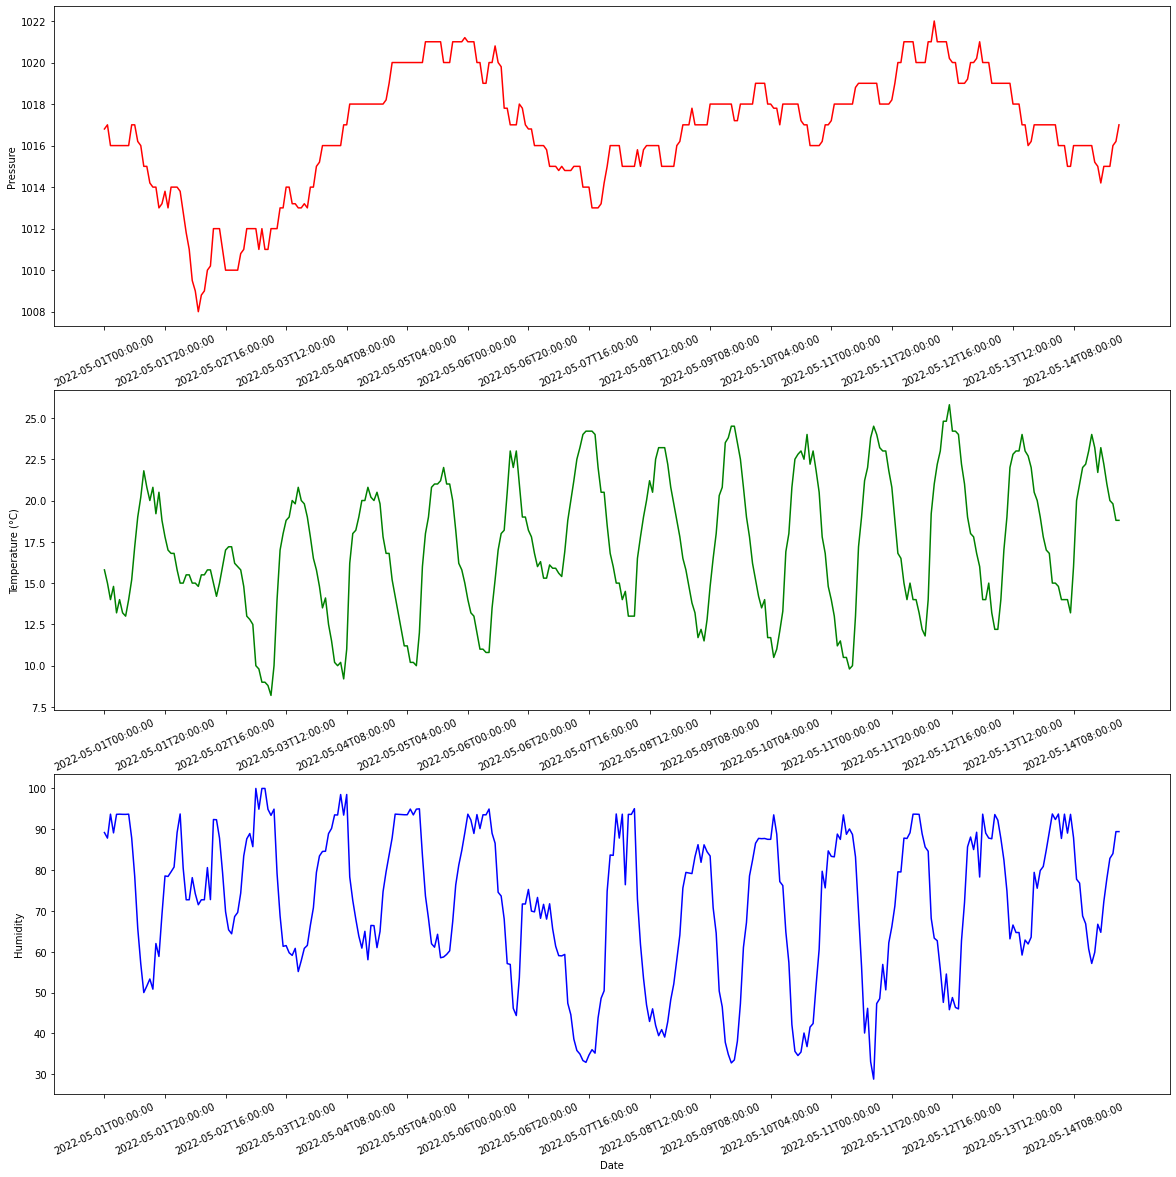

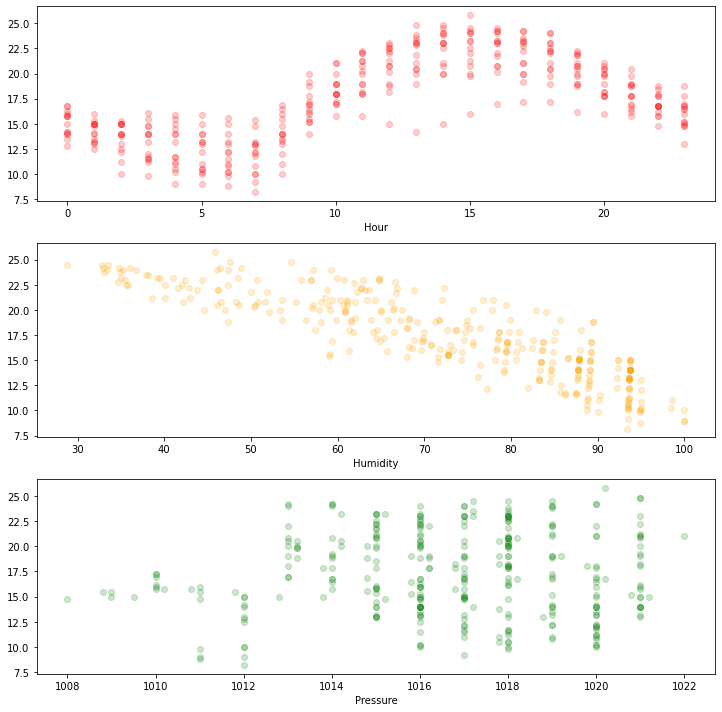

---------- Εκτύπωση συντελεστών ----------
Παράμετροι βν:  [(0.14716356527283184, 'Hour'), (-0.17561079729601536, 'Humidity'), (0.19114942962210896, 'Pressure')]
Παράμετρος β0: -166.03924372813336
Συντελεστής προσδιορισμού: 0.815740927124329

========== Πρόγνωση της θερμοκρασίας την επόμενη ώρα ==========
Επιλέξτε λειτουργία πληκτρολογώντας το γράμμα που της αντιστοιχεί:

Α - Πρόβλεψη της θερμοκρασίας την επόμενη ώρα 

B - Τερματισμός προγράμματος

Δώστε την επιλογή σας: 
A
Πληκτρολογήστε την υγρασία: 60
Πληκτρολογήστε την πίεση: 1016
Πρόγνωση...

Ανάκτηση προγνωστικού μοντέλου...

Την επόμενη ώρα η θερμοκρασία θα είναι: 17.77909249544126
Επιλέξτε λειτουργία πληκτρολογώντας το γράμμα που της αντιστοιχεί:

Α - Πρόβλεψη της θερμοκρασίας την επόμενη ώρα 

B - Τερματισμός προγράμματος



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pickle
import requests

##################################
#API call - csv returned
##################################

#We send a GET request to the visualcrossing API asking for it to be returned
#a csv for the requested time range.
#CAUTION! Don't forget to put the API Key you received.
my_req = requests.get('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Patras%2C%20Greece/2022-05-01/2022-05-14?unitGroup=metric&include=hours&key=YOUR_KEY&contentType=csv')


#the returned result is in its text property
# of the response object we created
print(my_req.text)
# to find the encoding of the text
print(my_req.encoding)
#save our data to a csv so we don't have to call the API again
with open("03-ΘΕ-02-ΥΕ-02-weather-data-01.csv",'w',encoding = my_req.encoding) as f:
   f.writelines(my_req.text)


##########################
# Reading the original csv
##########################

filename = "03-ΘΕ-02-ΥΕ-02-weather-data-01.csv"

# Reading the dataset from a csv file
df1 = pd.read_csv(filename)

####################
#Edit the csv
####################

# Extract the time of day from the date and create a new column in the dataframe
df1['Hour'] = pd.to_datetime(df1['datetime']).dt.hour

# We only keep the data: time of day, temperature, humidity and pressure
df = df1[['datetime','Hour', 'temp', 'humidity', 'sealevelpressure']]

# Rename the columns
df.rename(columns={'temp': 'Temperature', 'humidity': 'Humidity', 'sealevelpressure': 'Pressure'}, inplace=True)
print(df)

#Save to csv the columns we kept
df.to_csv("03-ΘΕ-02-ΥΕ-02-weather-data-patras-01-02.csv", index = False)


###############################################
#Construction of time series variance plots
###############################################
# Read from the new csv file
df = pd.read_csv("03-ΘΕ-02-ΥΕ-02-weather-data-01-02.csv")

#Time series variance plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
#Variation plot of pressure time series
ax1.plot(df['datetime'], df['Pressure'], color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Pressure')
ax1.set_xticks(df['datetime'][::20])
ax1.set_xticklabels(df['datetime'][::20], rotation=25)
#Temperature time series variation plot
ax2.plot(df['datetime'], df['Temperature'], color='green')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (°C)')
ax2.set_xticks(df['datetime'][::20])
ax2.set_xticklabels(df['datetime'][::20], rotation=25)
#Humidity time series variance plot
ax3.plot(df['datetime'], df['Humidity'], color='blue')
ax3.set_xlabel('Date')
ax3.set_ylabel('Humidity')
ax3.set_xticks(df['datetime'][::20])
ax3.set_xticklabels(df['datetime'][::20], rotation=25)
plt.show()

# We define the independent variables that we will use as a list
feat_cols = ['Hour', 'Humidity', 'Pressure']
# Construction of the diagram relating the independent variables to the temperature
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.scatter(df[feat_cols[0]], df['Temperature'], color='red', alpha=0.2)
ax2.scatter(df[feat_cols[1]], df['Temperature'], color='orange', alpha=0.2)
ax3.scatter(df[feat_cols[2]], df['Temperature'], color='green', alpha=0.2)
ax1.set_xlabel(feat_cols[0])
ax2.set_xlabel(feat_cols[1])
ax3.set_xlabel(feat_cols[2])
plt.tight_layout()
plt.show()

# We transform the data of the independent variable into a 2-dimensional array
h_array = df[feat_cols].values
w_array = df['Temperature'].values

# Create multiple linear regression model
model_reg = linear_model.LinearRegression().fit(h_array, w_array)

# Print coefficients
print("---------- Print coefficients ----------")
print("Pamerameters bn: ", list(zip(model_reg.coef_, feat_cols)))
print("Parameter b0: " + str(model_reg.intercept_))
print("Coefficient of determination: " + str(model_reg.score(h_array, w_array)))
print("")

# Save the trained model to disk
with open("model.pickle", "wb") as f:
    pickle.dump(model_reg, f)


#############
# Functions
#############
# Function to input the user and check it
def user_input():
    # Retrieve the current time
    hour = pd.Timestamp.now().hour
    while True:
        try:
            hum = float(input('Enter the humidity: '))
            press = float(input('Enter the pressure: '))
            if hum > 0 and press > 0:
                break
            else:
                print("Please give positive value")
        except ValueError:
            print("Wrong value.")
    return hour, hum, press

# Function to Retrieve the trained model
def get_model():
    # Retrieve the trained model from disk
    print("Ανάκτηση προγνωστικού μοντέλου...\n")
    with open("model.pickle", "rb") as f:
        model_load = pickle.load(f)

    return model_load


# Show menu function
def start_menu():
    print("========== Temperature forecast for the next hour ==========")
    while True:
        print('Select a function by typing the letter that corresponds to it:\n')
        print('Α - Forecast the temperature in the next hour \n')
        print('B - End program\n')

        func = input('Give your choice: \n')

        if func == 'A':
            # Retrieve time, humidity and pressure as user input
            hour, humidity, pressure = user_input()

            # Input data to the model
            input_data = [hour, humidity, pressure]

            # We transform the data into a 2-dimensional array
            final_input = np.array([input_data]).reshape((1, -1))

            # Forecast
            print("Forecast...\n")
            model_load = get_model()
            prediction_1 = model_load.predict(final_input)

            # Output is an array with 1 element
            print("The next hour the temperature will be: " + str(prediction_1[0]))
        elif func == 'B':
            print('End program...\n')
            break
        else:
            print("The option you have given is incorrect.\n")


########################################
# Call user options menu function
########################################
start_menu()
